In [2]:
#Batch and Stochastic Training
#This python function illustrates two different training methods: batch and stochastic training. For each model, we will use a regression model that predicts one model variable.
#We start by loading the necessary libraries and resetting the computational graph.
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()


In [57]:
#Stochastic Training
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape = [1],dtype = tf.float32)
y_target = tf.placeholder(shape = [1], dtype = tf.float32)


In [58]:
#Create variable(one model parameter = A)
A = tf.Variable(tf.random_normal(shape = [1]))

#Add operation to graph
my_output = tf.multiply(x_data, A)


In [59]:
#Add L2 loss operation to graph
loss = tf.square(my_output - y_target)


In [60]:
#Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

#Initialize variable
init = tf.global_variables_initializer()
sess.run(init)

In [61]:
#Train Model
#We run the training step for 100 iterations and print off the value of A and the loss every 5 iterations.
loss_stochastic = []
#Run loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict = {x_data:rand_x, y_target:rand_y})
    if(i + 1)%5 ==0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)
print(loss_stochastic)

                                      

Step #5 A = [0.9159432]
Loss = [81.68012]
Step #10 A = [2.5540202]
Loss = [53.958786]
Step #15 A = [3.9151933]
Loss = [35.109352]
Step #20 A = [5.0311294]
Loss = [27.793268]
Step #25 A = [5.9190717]
Loss = [7.765018]
Step #30 A = [6.6442976]
Loss = [7.693056]
Step #35 A = [7.1656823]
Loss = [2.0179064]
Step #40 A = [7.662066]
Loss = [1.8009717]
Step #45 A = [8.070454]
Loss = [11.310465]
Step #50 A = [8.386862]
Loss = [0.10237661]
Step #55 A = [8.668648]
Loss = [2.8569303]
Step #60 A = [8.8415985]
Loss = [5.4438243]
Step #65 A = [9.00343]
Loss = [6.738447]
Step #70 A = [9.127777]
Loss = [0.02012886]
Step #75 A = [9.273399]
Loss = [3.8367941]
Step #80 A = [9.340857]
Loss = [0.40851352]
Step #85 A = [9.38514]
Loss = [5.859489]
Step #90 A = [9.643757]
Loss = [1.4333833]
Step #95 A = [9.55982]
Loss = [0.92411584]
Step #100 A = [9.661545]
Loss = [2.611167]
[array([81.68012], dtype=float32), array([53.958786], dtype=float32), array([35.109352], dtype=float32), array([27.793268], dtype=float32

In [48]:
#Batch Training
#Re-initialize graph
ops.reset_default_graph()
sess = tf.Session()



In [49]:
#Declare batch size
batch_size = 20


In [50]:
#Create data
#Note that here, our placeholders have shape [None, 1], where the batch size will take the place of the None dimension.
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None,1], dtype = tf.float32)



In [51]:
#Model Variables and Operation
#We create the one variable in the graph, A. We then create the model operation, which is just the multiplication of the input data and A.
#Create variable(one model parameter = A)
A = tf.Variable(tf.random_normal(shape = [1,1]))

#Add operation to graph
my_output = tf.matmul(x_data, A)


In [52]:
#Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))


In [53]:
#Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

#Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)


In [54]:
#Train Model
loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict = {x_data:rand_x, y_target:rand_y})
    if(i + 1)%5 == 0:
        print('Step #' + str(i +1) + 'A =' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict = {x_data:rand_x, y_target:rand_y})
        print('Loss = '+ str(temp_loss))
        loss_batch.append(temp_loss)
print(loss_batch)

Step #5A =[[2.0224857]]
Loss = 64.18443
Step #10A =[[3.4860117]]
Loss = 43.73087
Step #15A =[[4.6847167]]
Loss = 30.78685
Step #20A =[[5.6521277]]
Loss = 17.52068
Step #25A =[[6.44606]]
Loss = 13.742244
Step #30A =[[7.088358]]
Loss = 9.047419
Step #35A =[[7.60738]]
Loss = 6.3763986
Step #40A =[[8.030198]]
Loss = 5.0242534
Step #45A =[[8.391668]]
Loss = 2.7122328
Step #50A =[[8.655523]]
Loss = 2.9009461
Step #55A =[[8.862179]]
Loss = 1.4940941
Step #60A =[[9.0406]]
Loss = 1.955074
Step #65A =[[9.185046]]
Loss = 1.7676773
Step #70A =[[9.345548]]
Loss = 1.6444972
Step #75A =[[9.435184]]
Loss = 0.8650602
Step #80A =[[9.504003]]
Loss = 0.8022664
Step #85A =[[9.597457]]
Loss = 1.4245138
Step #90A =[[9.659575]]
Loss = 1.2728412
Step #95A =[[9.733512]]
Loss = 1.5125976
Step #100A =[[9.756245]]
Loss = 0.891832
[64.18443, 43.73087, 30.78685, 17.52068, 13.742244, 9.047419, 6.3763986, 5.0242534, 2.7122328, 2.9009461, 1.4940941, 1.955074, 1.7676773, 1.6444972, 0.8650602, 0.8022664, 1.4245138, 1.272

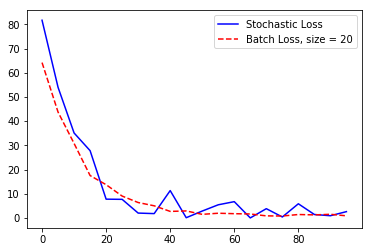

In [62]:
#Plot Sochastic vs Batch Training
plt.plot(range(0,100,5), loss_stochastic, 'b-', label = 'Stochastic Loss')
plt.plot(range(0,100,5),loss_batch, 'r--', label = 'Batch Loss, size = 20')
plt.legend(loc = 'upper right',prop={'size':10})
plt.show()